# Assessing model accuracy: bias-variance trade-off

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

# Modeling libraries
import statsmodels.formula.api as smf # welcome!!
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')

import pandas as pd
np.random.seed(123)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Measuring-quality-of-fit" data-toc-modified-id="Measuring-quality-of-fit-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Measuring quality of fit</a></span><ul class="toc-item"><li><span><a href="#Train-error" data-toc-modified-id="Train-error-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Train error</a></span></li><li><span><a href="#Test-error" data-toc-modified-id="Test-error-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Test error</a></span></li></ul></li><li><span><a href="#Bias-variance-trade-off" data-toc-modified-id="Bias-variance-trade-off-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Bias-variance trade-off</a></span></li><li><span><a href="#Fighting-overfitting:-regularization" data-toc-modified-id="Fighting-overfitting:-regularization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fighting overfitting: regularization</a></span><ul class="toc-item"><li><span><a href="#L1-regularization:-LASSO" data-toc-modified-id="L1-regularization:-LASSO-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>L1 regularization: LASSO</a></span></li><li><span><a href="#L2-regularization:-Ridge" data-toc-modified-id="L2-regularization:-Ridge-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>L2 regularization: Ridge</a></span></li><li><span><a href="#L1-+-L2:--regularization:-ElasticNet" data-toc-modified-id="L1-+-L2:--regularization:-ElasticNet-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>L1 + L2:  regularization: ElasticNet</a></span></li><li><span><a href="#Model-diagnosis" data-toc-modified-id="Model-diagnosis-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Model diagnosis</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>References</a></span></li></ul></div>

## Measuring quality of fit

**No free lunch theorem:** There is no single *best* method in ML over all possible datasets and bussines/research applications. So, given my particular data and problem: what is the best method?

When studying linear regression we saw that we modeled the data with a function:

 $$ Y = \beta_0 +  \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_2 X_m   + \epsilon$$


Where:
 * $X$ = predictor variable
 * $Y$ = target variable
 * $\beta_i$ = regression coefficients
 * $\epsilon$ = noise (Gaussian)

### Train error

We are already familiar with a very commonly used metric to calculate the *error* we make in a linear regression setting:

$$MSE = \frac{1}{N}\sum(y_i - \hat{y}_i)^2$$

In [7]:
# TRUE f (linear)
num_points = 50
beta_1 =  0.08#0.08
beta_0 = 12
X = np.random.normal(600, 150, num_points) # study hours
y = beta_0 + (beta_1 * X) + np.random.normal(loc=0, scale=3, size=num_points)

In [9]:
# estimate the parameters of the coefficient using sklearn
reg = LinearRegression()
reg.fit(X.reshape(-1, 1), y)


LinearRegression()

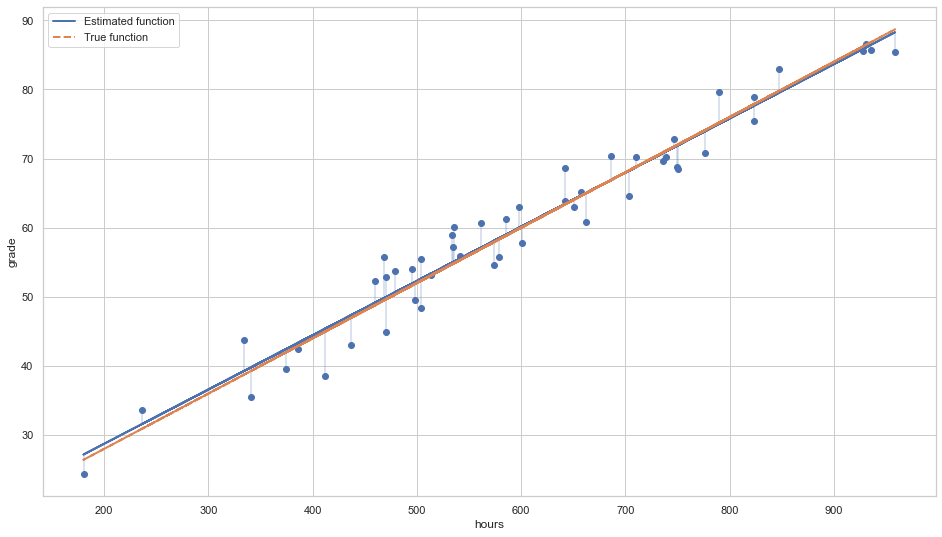

In [11]:
# ESTIMATED f
y_hat =reg.predict(X.reshape(-1,1))

# Errors
plt.scatter(X, y)
plt.plot(X, y_hat, lw=2, label='Estimated function')
plt.plot(X, beta_0 + beta_1 * X, lw=2, label='True function', linestyle='--')

plt.vlines(X, y_hat, y, lw=0.4)
plt.xlabel('hours')
plt.ylabel('grade')
plt.legend()
plt.show()

In [12]:
mean_squared_error(y, y_hat)

10.098497163261817

**Non-linear functions**

In general, any ML regression problem assumes that

$$ Y = f(X) + \epsilon .$$

In linear regression $f(X)$ just happens to be a linear function. Our goal as machine learning practioners is to estimate $f(X)$ (we call our estimate $\hat{f}(X)$) to estimate unseen values of our target variable:


$$ \hat{Y} = \hat{f}(X).$$

In [43]:
# TRUE f (non_linear)
np.random.seed(123)
num_points = 30

X = np.linspace(1,5.5, num_points).reshape(-1, 1)
f = lambda X: 1 +  X*(np.sin(X)) 
y_exact = f(X)

error = np.random.normal(0, 1.5 ,num_points).reshape(-1, 1)
y = f(X) + error 

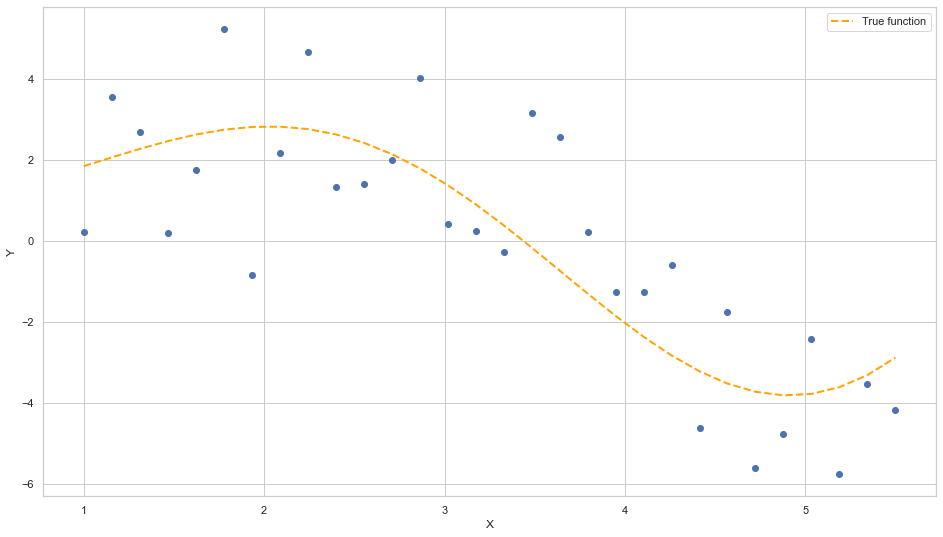

In [84]:
plt.scatter(X, y)
plt.plot(X, y_exact, lw=2, label='True function', linestyle='--', color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

**Polynomial Regression** 

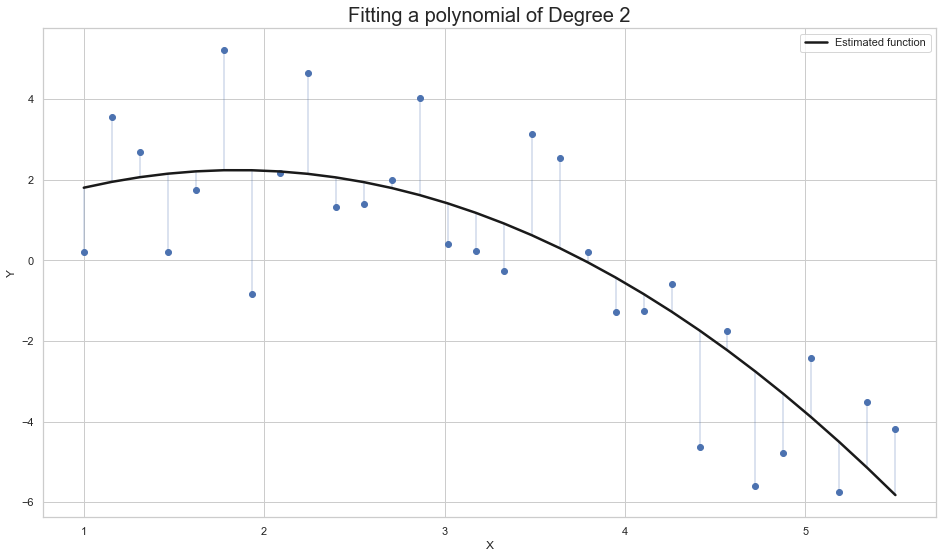

MSE = 2.8243353015577513


In [93]:
# Create polynomial features of degree k
k = 2
poly = PolynomialFeatures(k)
X_poly = poly.fit_transform(X.reshape(-1,1))

# estimate the parameters of the coefficient using sklearn
reg = LinearRegression()
reg.fit(X_poly, y)
y_hat = reg.predict(X_poly) 
# plot results
plt.scatter(X, y)
plt.plot(X, y_hat, lw=2.5, label='Estimated function', color = 'k')
#plt.plot(X, y_exact, lw=2, label='True function', linestyle='--', color='orange')

plt.vlines(X, y_hat, y, lw=0.4)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title(f'Fitting a polynomial of Degree {k}', size=20)
plt.show()
print(f'MSE = {mean_squared_error(y, y_hat)}')


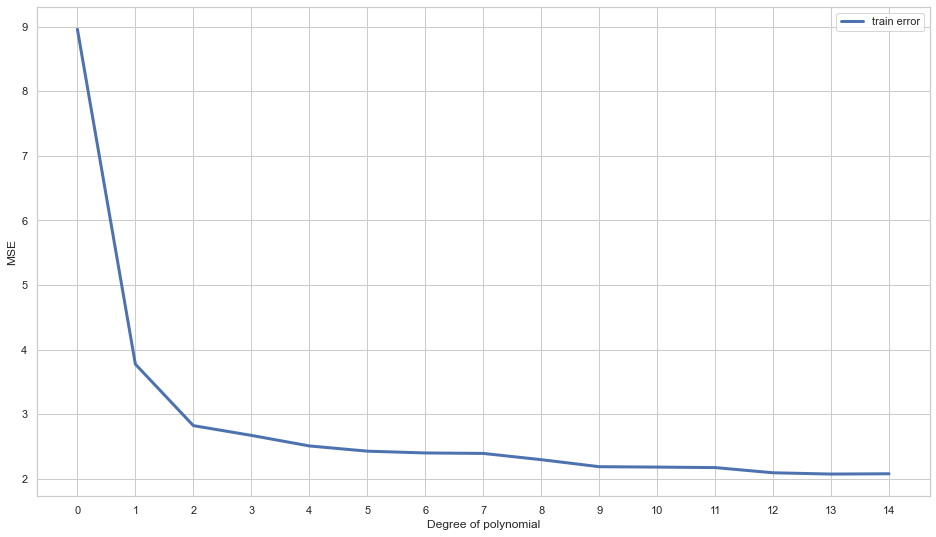

In [46]:
reg = LinearRegression()
errors = []
domain = range(15)
for k in domain:
    poly = PolynomialFeatures(k)
    X_poly = poly.fit_transform(X.reshape(-1,1))
    # estimate the parameters of the coefficient using sklearn
    reg.fit(X_poly, y)
    y_hat = reg.predict(X_poly) 
    error_k = mean_squared_error(y, y_hat)
    errors.append(error_k)

plt.plot(domain, errors, linewidth= 3, label ='train error')
plt.ylabel('MSE')
plt.xlabel('Degree of polynomial')
plt.xticks(domain)
plt.legend()
plt.show()

### Test error

A better way to estimate the TRUE error of our model is with the TEST error.

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

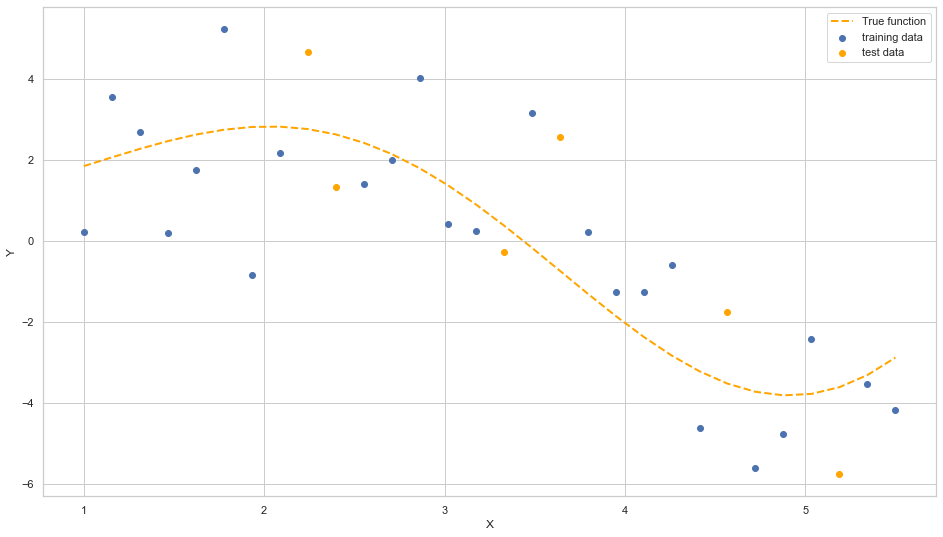

In [90]:
plt.scatter(X_train, y_train, c='b', label='training data')
plt.scatter(X_test, y_test, c='orange', label='test data')

plt.plot(X, y_exact, lw=2, label='True function', linestyle='--', color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

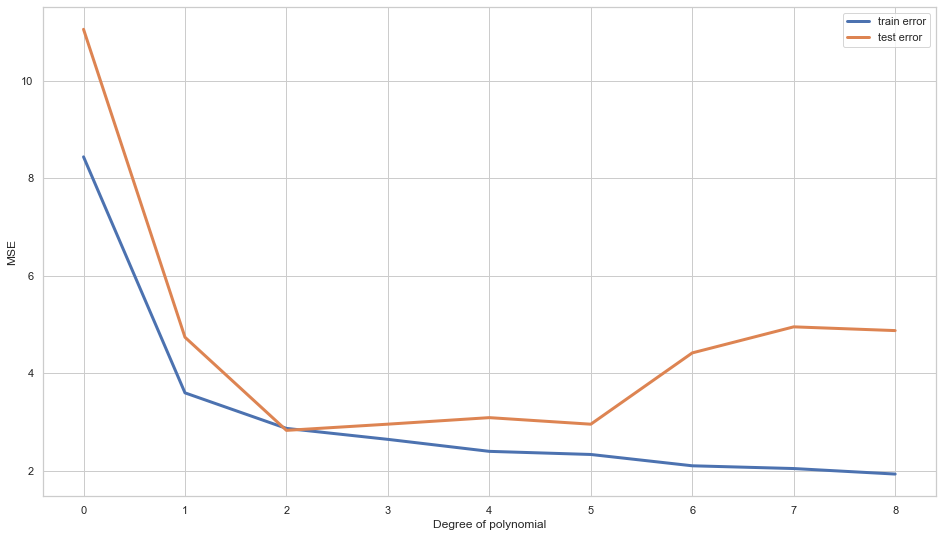

In [91]:
reg = LinearRegression()
train_errors = []
test_errors = []
domain = range(9)
for k in domain:
    poly = PolynomialFeatures(k)
    X_poly_train = poly.fit_transform(X_train.reshape(-1,1))
    # estimate the parameters of the coefficient using sklearn
    reg.fit(X_poly_train, y_train)
    y_hat_train = reg.predict(X_poly_train) 
    error_k_train = mean_squared_error(y_train, y_hat_train)
    train_errors.append(error_k_train)
    
    X_poly_test = poly.fit_transform(X_test.reshape(-1,1))
    # estimate the parameters of the coefficient using sklearn
    y_hat_test = reg.predict(X_poly_test) 
    error_k_test = mean_squared_error(y_test, y_hat_test)
    test_errors.append(error_k_test)

plt.plot(domain, train_errors, linewidth= 3, label ='train error')
plt.plot(domain, test_errors, linewidth= 3, label ='test error')

plt.ylabel('MSE')
plt.xlabel('Degree of polynomial')
plt.xticks(domain)
plt.legend()
plt.show()

## Bias-variance trade-off

In every model we create there is a trade-off between how well it can fit the data (complexity/flexibility) and how well it generalizes to unobserved data.

Mathematically, the error of our model can be split in three different terms: 


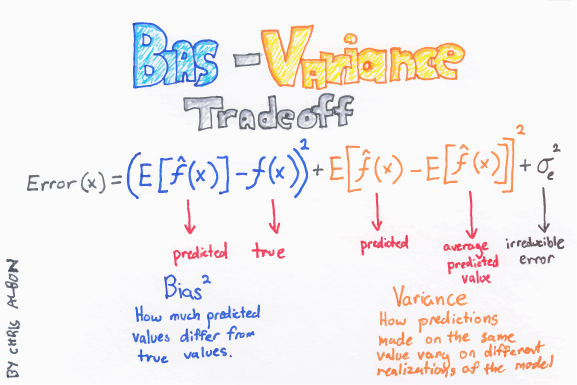

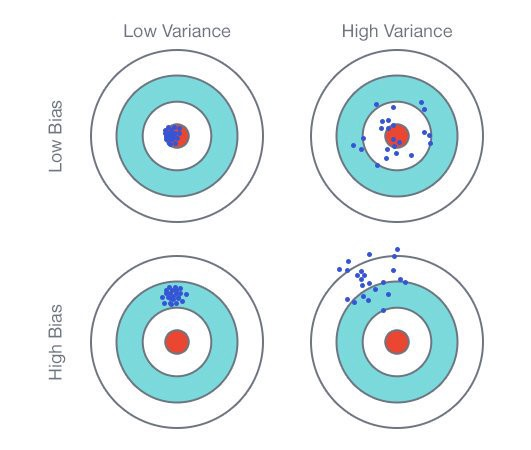

This trade off usually translates into the following error curves:

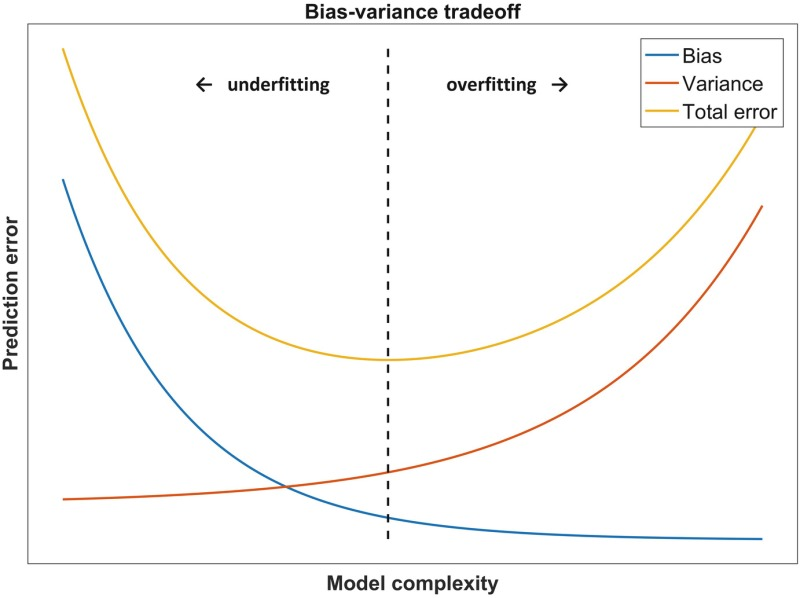

Two terms you MUST be familiar with are:

* **Underfitting**: When the model is to simple and is unable to capture complex (existing) patterns in your data (high Bias).
* **Overfitting**: When our model is too complex/flexible and starts "learning" from the noise rather than from the signal (High Variance).


Source: [Understanding the bias-variance trade-off](https://medium.com/@mp32445/understanding-bias-variance-tradeoff-ca59a22e2a83) 

## Fighting overfitting: regularization

So far, our linear models have tried to minimize only the error (MSE) they make, but we have seen that this can lead to problems such as overfitting. One way to address this issue is to penalize having large coefficients in your model.

See [Medium post](https://medium.com/@arunm8489/an-overview-on-regularization-f2a878507eae) on the topic.

### L1 regularization: LASSO

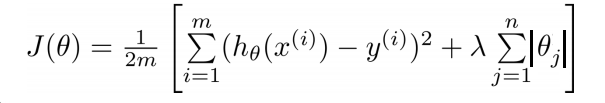

* L1 penalizes sum of absolute value of weights.
* L1 has a sparse solution
* L1 generates model that are simple and interpretable but cannot learn complex patterns
* L1 is robust to outliers

In [61]:
# TRUE f (non_linear)
np.random.seed(123)
num_points = 30

X = np.linspace(1,5.5, num_points).reshape(-1, 1)
f = lambda X: 1 +  X*(np.sin(X)) 
y_exact = f(X)

error = np.random.normal(0, 1.5 ,num_points).reshape(-1, 1)
y = f(X) + error 

In [78]:
# Regularization parameter
alpha = 10000000000000000000000000 # Larger values specify stronger regularization
reg = Lasso(alpha=alpha, max_iter=10000)

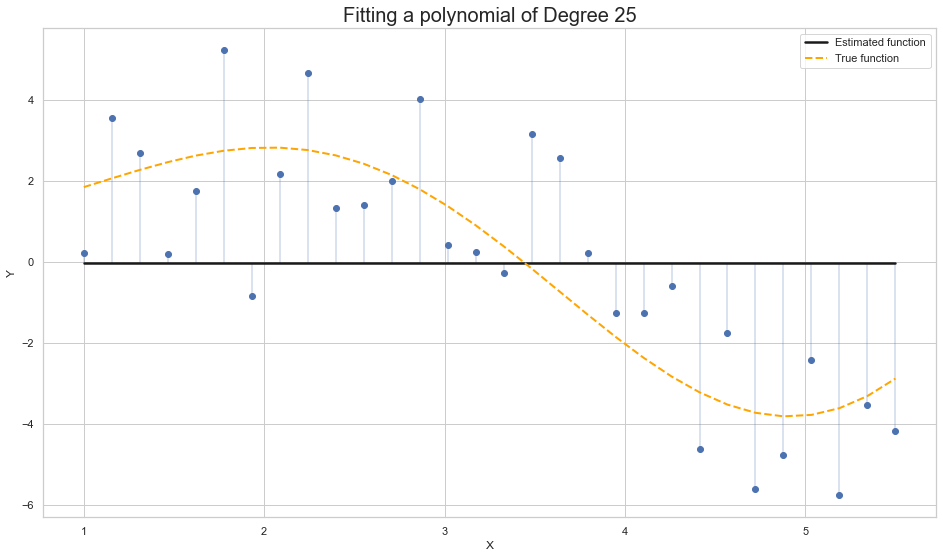

MSE = 8.95974830561799


In [79]:
# Create polynomial features of degree k
k = 25
poly = PolynomialFeatures(k)
X_poly = poly.fit_transform(X.reshape(-1,1))

# estimate the parameters of the coefficient using sklearn
reg.fit(X_poly, y)
y_hat = reg.predict(X_poly) 
# plot results
plt.scatter(X, y)
plt.plot(X, y_hat, lw=2.5, label='Estimated function', color = 'k')
plt.plot(X, y_exact, lw=2, label='True function', linestyle='--', color='orange')

plt.vlines(X, y_hat, y, lw=0.4)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title(f'Fitting a polynomial of Degree {k}', size=20)
plt.show()
print(f'MSE = {mean_squared_error(y, y_hat)}')

### L2 regularization: Ridge

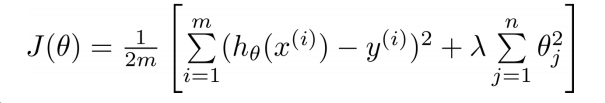

* L2 regularization penalizes sum of square weights.
* L2 has a non sparse solution
* L2 regularization is able to learn complex data patterns
* L2 has no feature selection
* L2 is not robust to outliers


### L1 + L2:  regularization: ElasticNet

## References
* [Introduction to Statistical Learning ISL (Chapter 2)](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)
* [repo from tdpetrou with materials from ISL](https://github.com/tdpetrou/Machine-Learning-Books-With-Python/tree/master/Introduction%20to%20Statistical%20Learning)


**NOTE** There is this new thing called *benign overfitting* that challenges this standard bias-variance thing!! You must understand the bias-variance trade-off but keep in mind it is been challenged!! 